# Tarea 1


CC5113 - Aprendizaje Automático Bayesiano

Profesor: Pablo Guerrero

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

# P1 Regresión Lineal

In [2]:
data = np.genfromtxt('datosT1.csv', delimiter=' ')
x = data[:,0]
y = data[:,1]

### A continuación se grafica la data:

Text(0,0.5,'Mediana del valor [miles de dólares]')

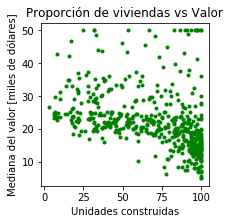

In [3]:
mpl.rcParams['figure.figsize'] = (3,3)
plt.figure()
plt.plot(x,y, 'g.')
plt.title("Proporción de viviendas vs Valor")
plt.xlabel("Unidades construidas")
plt.ylabel("Mediana del valor [miles de dólares]")

### Regresión lineal regularizada

Sabemos que para la regresión lineal regularizada, el parámetro $\theta$ tiene la forma:
\begin{equation}
\theta = (\tilde{X}^{T}\tilde{X} + \rho I)^{-1} \tilde{X}^{T}Y
\end{equation}

Dado que este es el caso en que $x \rightarrow f(x) \ \epsilon \ \rm I\!R \rightarrow \rm I\!R$, tenemos que $\tilde{X}$ tiene la forma

\begin{equation}
\tilde{X} = \begin{bmatrix}
           x_{1} & 1\\
           x_{2} & 1\\
           \vdots & \vdots \\
           x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}

Por lo que la identidad pertenecerá a $\rm I\!R^{2x2}$ y $\theta$ a $\rm I\!R^{2}$, lo cual tiene sentido ya que $\theta$ tiene la forma de un vector de dos componentes, cuyos valores corresponderán a la pendiente $m$ y el coeficiente de posición $b$ de una recta. 

In [4]:
x_tilda = np.array([x, np.ones(len(x))]).transpose()
y_reg = y
rho = 0
identidad = np.identity(2)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

Luego de obtener $\theta$ en función de $\rho$, procedemos a graficar predicciones para 10 puntos con distintos valores de $\rho$:

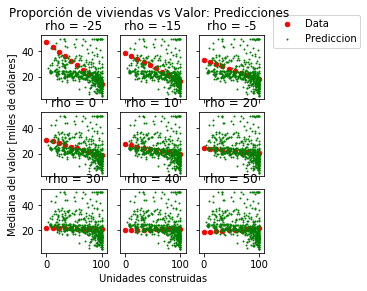

In [8]:
def recta(x, rho): 
    theta = get_theta(rho)
    return x * theta[0] + theta[1]

mpl.rcParams['figure.figsize'] = (4,4)
x_recta = np.linspace(0, 100, 10)
scatter_size = 20
f, figures = plt.subplots(3, 3, sharex='col', sharey='row')
plt.suptitle("Proporción de viviendas vs Valor: Predicciones")
rho = np.array([[-25, -15, -5], [0, 10, 20], [30, 40, 50]])
for idx, figure_arr in enumerate(figures):
    for idy, figure in enumerate(figure_arr):
        figure.set_title("rho = " + str(rho[idx][idy]))
        figure.scatter(
            x_recta,
            recta(x_recta, rho[idx][idy]), 
            s=scatter_size, c='r')
        figure.scatter(x,y, s=1, c='g')   
            
        if idy == 1 and idx == 2:
            figure.set_xlabel("Unidades construidas")
        
        if idy == 0 and idx == 1:
            figure.set_ylabel("Mediana del valor [miles de dólares]")
            
        if idy == len(rho[0]) - 1 and idx == 0:
            figure.legend(["Data","Prediccion"], bbox_to_anchor=(1.05, 1.40))

### Comparando con polyfit

Es claro observar que el resultado de __polyfit__ es equivalente a usar nuestro resultado usando $\rho = 0$, es más notamos que los parámetros de ambas rectas son casi idénticos:

In [6]:
print("Theta polyfit: ", np.polyfit(x,y, 1))
print("Theta formula: ", get_theta(0))

Theta polyfit:  [-0.12316272 30.97867776]
Theta formula:  [-0.12316272 30.97867776]


# P3 Proyecto curso

Mi propuesta es estudiar de forma teórica y práctica el problema de clasificación de textos según tópicos. Este problema lo estoy viendo en un proyecto de otro ramo en el cual se usan herramientas de teoría de la información y me interesa complementar dichas herramientas con los conceptos vistos en este curso. El problema a resolver se explica con el siguiente ejemplo: 
"Se tienen diversos conjuntos de textos, por ejemplo artículos sobre matemáticas, física y biología, y un texto que sabemos que pertenece a uno de estos conjuntos pero no a cuál. El problema consiste en determinar el conjunto al que el texto pertenece."
Dada la descripción, en primera instancia es un problema de aprendizaje supervisado.
